In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
%matplotlib inline

In [60]:
def income_sim(param):
    
    # setting random seed and generating a matrix of 40 x 10,000 errors (10,000 sets of 40)
    np.random.seed()
    err = np.random.normal(param['err_m'], param['std'], (param['num_year'], param['num_sim']))
    
    # making the main matrix and filling with zeroes, ln because that is the structure of the first equation
    ln_income = np.zeros((param['num_year'], param['num_sim']))
    
    # filling with first equation
    ln_income[0, :] = np.log(param['inc_s']) + err[0, :]
    
    for year in range(1, param['num_year']):
        ln_income[year, :] = ((1 - param['p']) * (np.log(param['inc_s']) + (param['g'] * (year - 0)))) + (param['p'] * np.log(ln_income[year - 1, :])) + err[year, :]
    
    print ln_income[1,1]
    income = np.exp(ln_income)
    return income;

### Question 1

9.5479449009


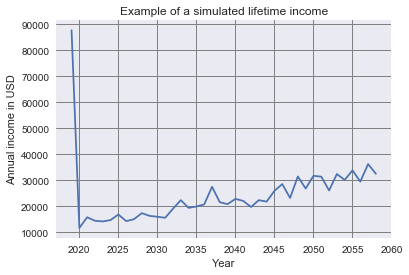

In [61]:
param = {
    'p'              :      0.2,                   # peristence
    'inc_s'          :      80000,                 # starting income
    'g'              :      0.03,                  # growth rate
    'num_sim'        :      10000,                 # number of simulations to run
    'st_year'        :      2019,                  # starting year
    'num_year'       :      40,                    # number of years working
    'std'            :      0.1,                   # standard deviation
    'err_m'          :      0                      # error mean

}

# running simulation
simulations = income_sim(param)

# plotting one instance
instance = 600 # random instance to plot
year_range = np.arange(param['st_year'], param['st_year'] + param['num_year'])
fig, ax = plt.subplots()
plt.plot(year_range, simulations[: , instance])
minor_locator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.title('Example of a simulated lifetime income', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Annual income in USD')



